Multi-layer perception is a...

## Set-Up

In [1]:
import nHnN_MLP as nMLP
import functions as fun
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
route = '../data/TMNIST_data.csv'
#route = 'insert your route here' 
testAmount = 1000
scale = 255
results = 10
rem_axis = "names"


test_y,test_x,train_y,train_x, pixels,train_trials,results = nMLP.process_data(route, testAmount, scale, results,rem_axis=rem_axis)

In [6]:
def train_and_evaluate(H, N, train_x, train_y, test_x, test_y, pixels, results, iters, alpha, act = "uniform", schedule = "fixed"):
    start = time.time()
    params,training_accuracy, epoch_time = nMLP.gradient_descent(H, N, train_x, train_y, pixels, results, iters, alpha, act, schedule)
    total_duration = time.time() - start
    OUT, _, _ = nMLP.forward_propogation(test_x, params)
    preds = np.argmax(OUT, axis=0)
    test_acc = np.mean(preds == test_y)
    
    return test_acc, total_duration, training_accuracy, epoch_time

## Neurons-Per-Layer

In [30]:

#Define number of neurons
neurons = [2,4,8,10,16,32,64,128,256]

#Define data arrays
Ntest_accs = []
Ntotal_times = []
Nresults_dic = {}

#Collect Data
for N in neurons:
    print(f"neuron number:{N}") 
    test_acc, total_duration, training_accuracy, epoch_time = train_and_evaluate(H=2, N=N, train_x=train_x, train_y=train_y,test_x=test_x, test_y=test_y,pixels=pixels, results=10, iters=500, alpha=0.01)
    Ntest_accs.append(test_acc)
    Ntotal_times.append(total_duration)

    Nresults_dic[N] = {
        "acc": training_accuracy,
        "time": epoch_time
    }


neuron number:2
Iteration 0, Accuracy=0.1103
Iteration 100, Accuracy=0.1468
Iteration 200, Accuracy=0.1620
Iteration 300, Accuracy=0.1617
Iteration 400, Accuracy=0.1915
neuron number:4
Iteration 0, Accuracy=0.0575
Iteration 100, Accuracy=0.1219
Iteration 200, Accuracy=0.1165
Iteration 300, Accuracy=0.1328
Iteration 400, Accuracy=0.1374
neuron number:8
Iteration 0, Accuracy=0.0848
Iteration 100, Accuracy=0.0803
Iteration 200, Accuracy=0.1592
Iteration 300, Accuracy=0.2053
Iteration 400, Accuracy=0.2309
neuron number:10
Iteration 0, Accuracy=0.0752
Iteration 100, Accuracy=0.1627
Iteration 200, Accuracy=0.2344
Iteration 300, Accuracy=0.3358
Iteration 400, Accuracy=0.4024
neuron number:16
Iteration 0, Accuracy=0.1048
Iteration 100, Accuracy=0.1564
Iteration 200, Accuracy=0.2925
Iteration 300, Accuracy=0.3623
Iteration 400, Accuracy=0.4110
neuron number:32
Iteration 0, Accuracy=0.1064
Iteration 100, Accuracy=0.2799
Iteration 200, Accuracy=0.4784


KeyboardInterrupt: 

#### Accuracy vs. Hidden Layer Width

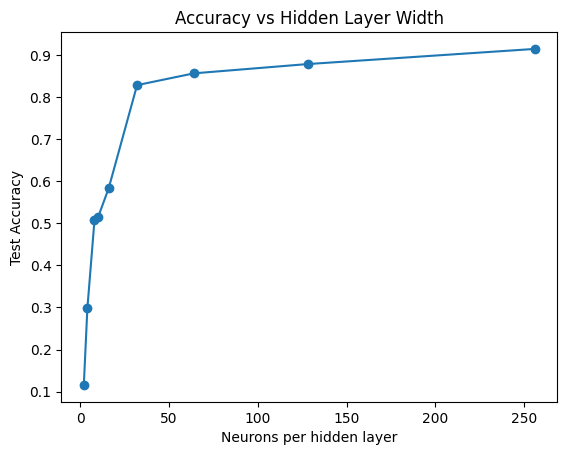

In [14]:
plt.plot(neurons, Ntest_accs, marker='o')
plt.xlabel("Neurons per hidden layer")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Hidden Layer Width")
plt.show()

#### Accuracy vs Normalized Training Time

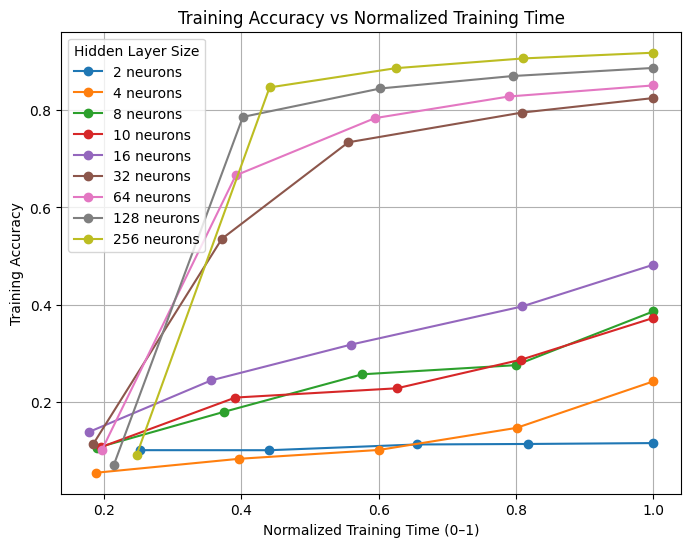

In [15]:
plt.figure(figsize=(8,6))

for idx, N in enumerate(Nresults_dic):
    times = np.array(Nresults_dic[N]["time"])
    accs = np.array(Nresults_dic[N]["acc"])
    
    cumulative_times = np.cumsum(times)
    norm_times = cumulative_times / cumulative_times[-1]
    
    plt.plot(norm_times, accs, marker='o', label=f"{N} neurons")

plt.xlabel("Normalized Training Time (0–1)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Normalized Training Time")
plt.legend(title="Hidden Layer Size")
plt.grid(True)
plt.show()

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

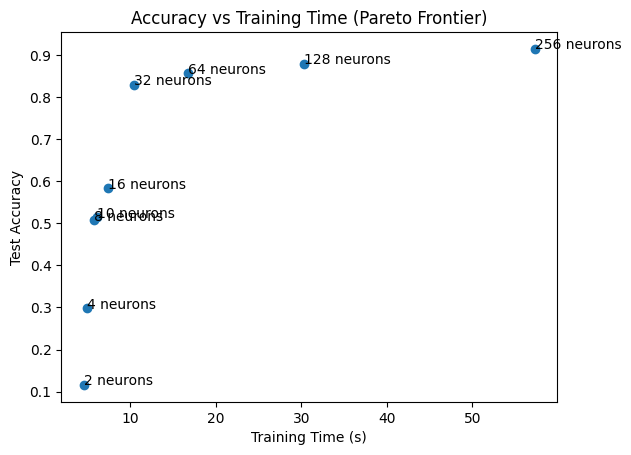

In [ ]:
plt.scatter(Ntotal_times, Ntest_accs)
for i, N in enumerate(neurons):
    plt.text(Ntotal_times[i], Ntest_accs[i], f"{N}")



plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")

## Hidden Layer Number

In [39]:

#Define number of neurons
hidden_layers = [2,3,5,10,15]

#Define data arrays
Htest_accs = []
Htotal_times = []
Hresults_dic = {}

#Collect Data
for H in hidden_layers:
    print(f"number of layers:{H}")
    test_acc, total_duration,training_accuracy, epoch_time = train_and_evaluate(H=H, N=10, train_x=train_x, train_y=train_y,
                                                                                        test_x=test_x, test_y=test_y,
                                                                                        pixels=pixels, results=10, iters=500, alpha=0.1)
    Htest_accs.append(test_acc)
    Htotal_times.append(total_duration)
    Hresults_dic[H] = {
        "acc": training_accuracy,
        "time": epoch_time
    }


number of layers:2
Iteration 0, Accuracy=0.0854
Iteration 100, Accuracy=0.6887
Iteration 200, Accuracy=0.8574
Iteration 300, Accuracy=0.8989


KeyboardInterrupt: 

#### Accuracy vs Hidden Layer Depth

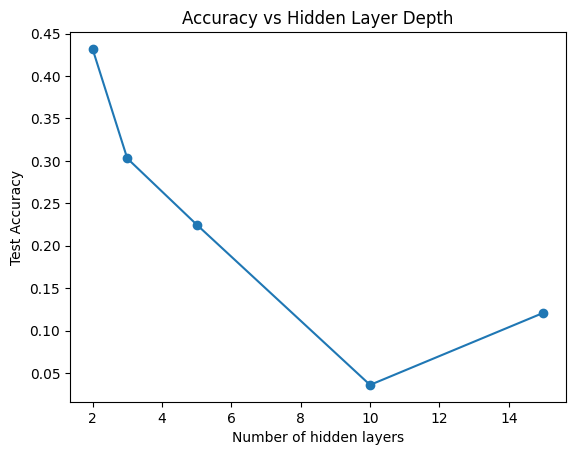

In [32]:
plt.plot(hidden_layers, Htest_accs, marker='o')
plt.xlabel("Number of hidden layers")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Hidden Layer Depth")
plt.show()

#### Training Accuracy vs Normalized Training Time

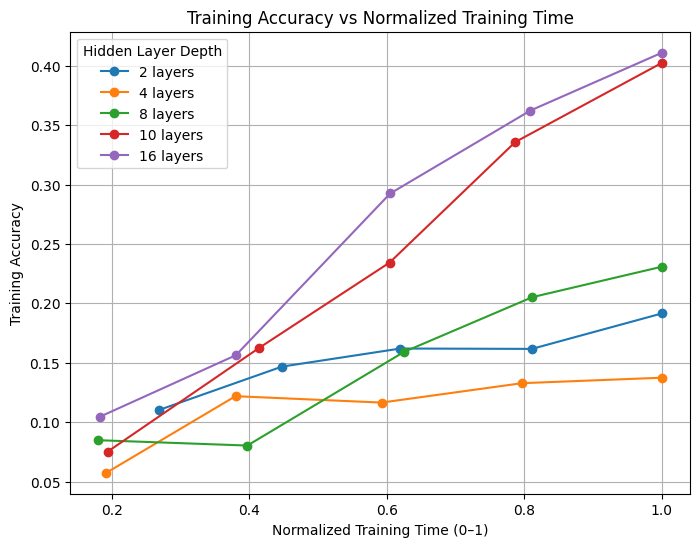

In [33]:
plt.figure(figsize=(8,6))

for idx, N in enumerate(Nresults_dic):
    times = np.array(Nresults_dic[N]["time"])
    accs = np.array(Nresults_dic[N]["acc"])
    
    cumulative_times = np.cumsum(times)
    norm_times = cumulative_times / cumulative_times[-1]
    
    plt.plot(norm_times, accs, marker='o', label=f"{N} layers")

plt.xlabel("Normalized Training Time (0–1)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Normalized Training Time")
plt.legend(title="Hidden Layer Depth")
plt.grid(True)
plt.show()

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

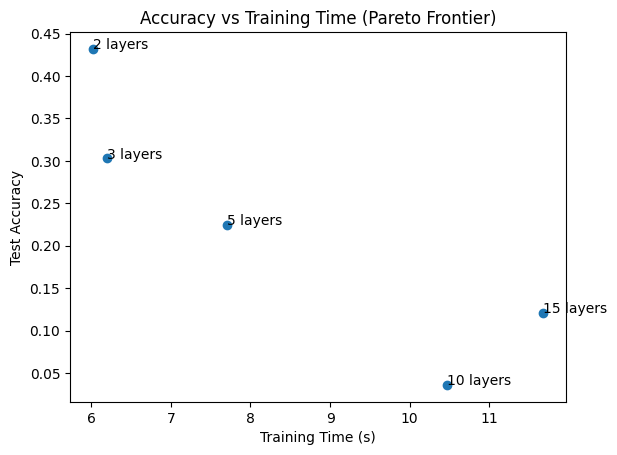

In [34]:
plt.scatter(Htotal_times, Htest_accs)
for i, H in enumerate(hidden_layers):
    plt.text(Htotal_times[i], Htest_accs[i], f"{H} layers")

plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")

## Different Initializations

In [17]:

#Define number of neurons
initialization_function = ["uniform","xavier","he"]

#Define data arrays
Itest_accs = []
Itotal_times = []
Iresults_dic = {}

#Collect Data
for I in initialization_function:
    print(f"initailization function:{I}") 
    test_acc, total_duration, training_accuracy, epoch_time = train_and_evaluate(H=2, N=10, train_x=train_x, train_y=train_y,test_x=test_x, test_y=test_y,pixels=pixels, results=10, iters=1000, alpha=0.05, act = initialization_function)
    Itest_accs.append(test_acc)
    Itotal_times.append(total_duration)

    initial_acc = training_accuracy[0]
    final_acc   = training_accuracy[-1]

    Iresults_dic[I] = {
        "acc": training_accuracy,
        "time": epoch_time,
        "initial": initial_acc,
        "final": final_acc
    }


initailization function:uniform
Iteration 0, Accuracy=0.1075
Iteration 100, Accuracy=0.3575
Iteration 200, Accuracy=0.5967
Iteration 300, Accuracy=0.7365
Iteration 400, Accuracy=0.8103
Iteration 500, Accuracy=0.8473
Iteration 600, Accuracy=0.8699
Iteration 700, Accuracy=0.8831
Iteration 800, Accuracy=0.8933
Iteration 900, Accuracy=0.9017
initailization function:xavier
Iteration 0, Accuracy=0.1088
Iteration 100, Accuracy=0.1905
Iteration 200, Accuracy=0.4676
Iteration 300, Accuracy=0.6182
Iteration 400, Accuracy=0.7315
Iteration 500, Accuracy=0.8075
Iteration 600, Accuracy=0.8527
Iteration 700, Accuracy=0.8774
Iteration 800, Accuracy=0.8916
Iteration 900, Accuracy=0.8992
initailization function:he
Iteration 0, Accuracy=0.1125
Iteration 100, Accuracy=0.6201
Iteration 200, Accuracy=0.8010
Iteration 300, Accuracy=0.8555
Iteration 400, Accuracy=0.8793
Iteration 500, Accuracy=0.8947
Iteration 600, Accuracy=0.9051
Iteration 700, Accuracy=0.9117
Iteration 800, Accuracy=0.9171
Iteration 900, Ac

#### Initial and Final Accuracies of Different Initialization Functions

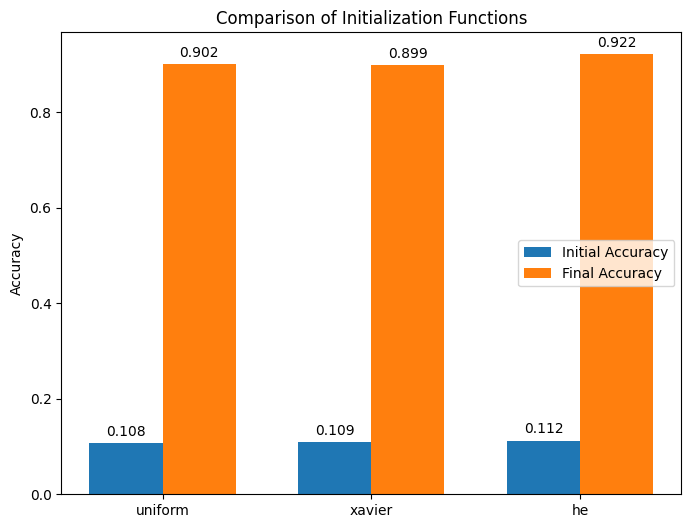

In [20]:
labels = list(Iresults_dic.keys())
initial_accs = [Iresults_dic[k]["initial"] for k in labels]
final_accs   = [Iresults_dic[k]["final"] for k in labels]

x = np.arange(len(labels))  # label locations
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, initial_accs, width, label="Initial Accuracy")
rects2 = ax.bar(x + width/2, final_accs, width, label="Final Accuracy")

ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Initialization Functions")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add bar labels
ax.bar_label(rects1, fmt="%.3f", padding=3)
ax.bar_label(rects2, fmt="%.3f", padding=3)

plt.show()

#### Accuracy vs. Normalized Training Time

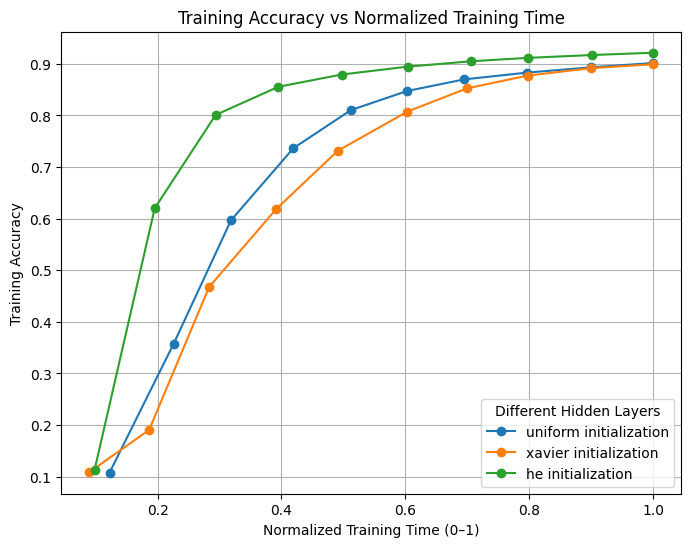

In [23]:
plt.figure(figsize=(8,6))

for i, I in enumerate(Iresults_dic):
    times = np.array(Iresults_dic[I]["time"])
    accs = np.array(Iresults_dic[I]["acc"])
    
    cumulative_times = np.cumsum(times)
    norm_times = cumulative_times / cumulative_times[-1]
    
    plt.plot(norm_times, accs, marker='o', label=f"{I} initialization")

plt.xlabel("Normalized Training Time (0–1)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Normalized Training Time")
plt.legend(title="Different Hidden Layers")
plt.grid(True)
plt.show()

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

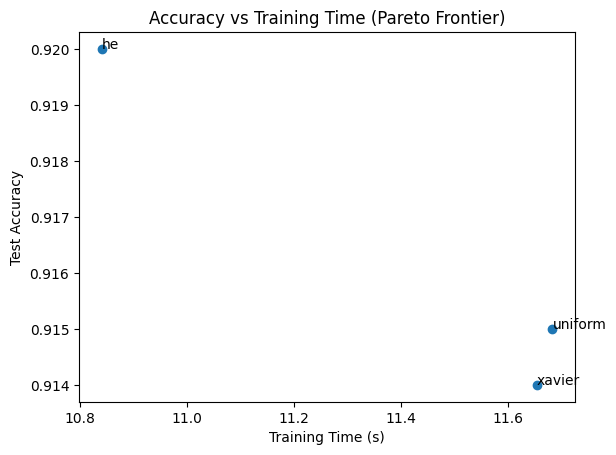

In [27]:
plt.scatter(Itotal_times, Itest_accs)
for i, I in enumerate(initialization_function):
    plt.text(Itotal_times[i],Itest_accs[i], f"{I}")


plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")

## Different Learning Rate Schedules

In [18]:

#Define number of neurons
schedules = ["fixed","step","exp","cosine"]

#Define data arrays
Stest_accs = []
Stotal_times = []
Sresults_dic = {}

#Collect Data
for S in schedules:
    print(f"schedule type:{S}")
    test_acc, total_duration,training_accuracy, epoch_time = train_and_evaluate(H=2, N=10, train_x=train_x, train_y=train_y,
                                                                                        test_x=test_x, test_y=test_y,
                                                                                        pixels=pixels, results=10, iters=1000, alpha=0.1,schedule = S)
    Stest_accs.append(test_acc)
    Stotal_times.append(total_duration)
    Sresults_dic[S] = {
        "acc": training_accuracy,
        "time": epoch_time
    }


schedule type:fixed
Iteration 0, Accuracy=0.1323
Iteration 100, Accuracy=0.6833
Iteration 200, Accuracy=0.8413
Iteration 300, Accuracy=0.8847
Iteration 400, Accuracy=0.9017
Iteration 500, Accuracy=0.9142
Iteration 600, Accuracy=0.9242
Iteration 700, Accuracy=0.9304
Iteration 800, Accuracy=0.9348
Iteration 900, Accuracy=0.9396
schedule type:step
Iteration 0, Accuracy=0.0734
Iteration 100, Accuracy=0.5469
Iteration 200, Accuracy=0.7174
Iteration 300, Accuracy=0.7721
Iteration 400, Accuracy=0.7929
Iteration 500, Accuracy=0.8008
Iteration 600, Accuracy=0.8044
Iteration 700, Accuracy=0.8065
Iteration 800, Accuracy=0.8075
Iteration 900, Accuracy=0.8081
schedule type:exp
Iteration 0, Accuracy=0.1157
Iteration 100, Accuracy=0.6025
Iteration 200, Accuracy=0.7225
Iteration 300, Accuracy=0.7495
Iteration 400, Accuracy=0.7576
Iteration 500, Accuracy=0.7603
Iteration 600, Accuracy=0.7615
Iteration 700, Accuracy=0.7618
Iteration 800, Accuracy=0.7619
Iteration 900, Accuracy=0.7619
schedule type:cosin

#### Training Accuracy Over Epochs of Different Schedules

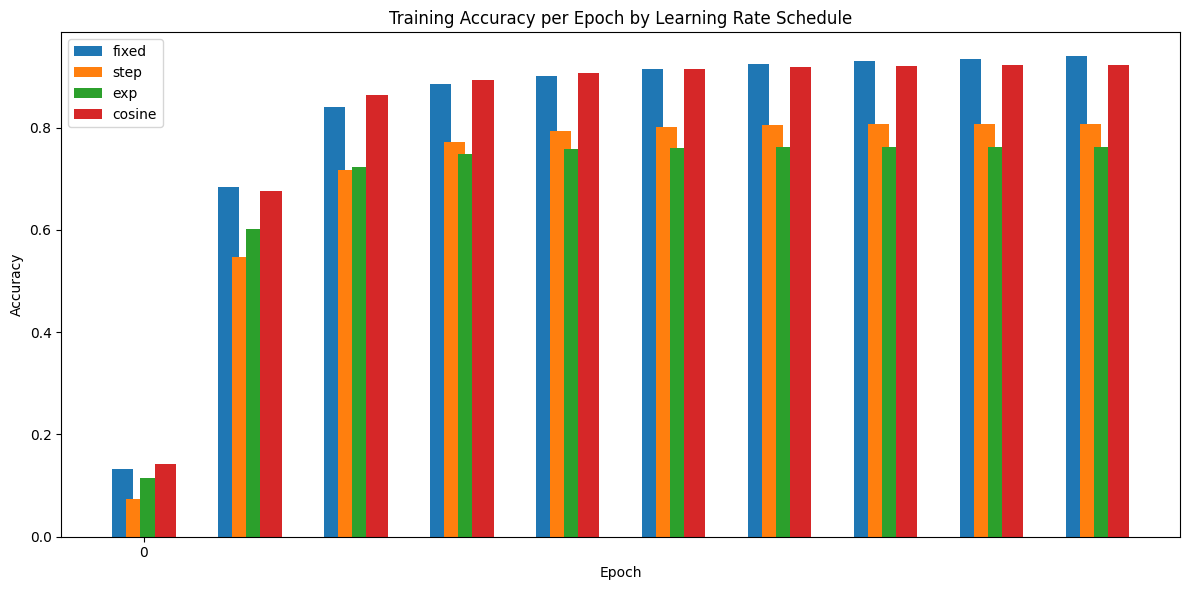

In [20]:
epochs = len(next(iter(Sresults_dic.values()))["acc"])  # number of epochs
x = np.arange(epochs)

# bar width
width = 0.2  
offsets = np.linspace(-width, width, len(Sresults_dic))  # spacing schedules

plt.figure(figsize=(12, 6))

for i, sched in enumerate(schedules):
    acc_history = Sresults_dic[sched]["acc"]
    plt.bar(x + offsets[i], acc_history, width, label=sched)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy per Epoch by Learning Rate Schedule")
plt.xticks(np.arange(0, epochs, step=50))  # fewer ticks if too crowded
plt.legend()
plt.tight_layout()
plt.show()

#### Training Accuracy Vs. Normalized Training Time

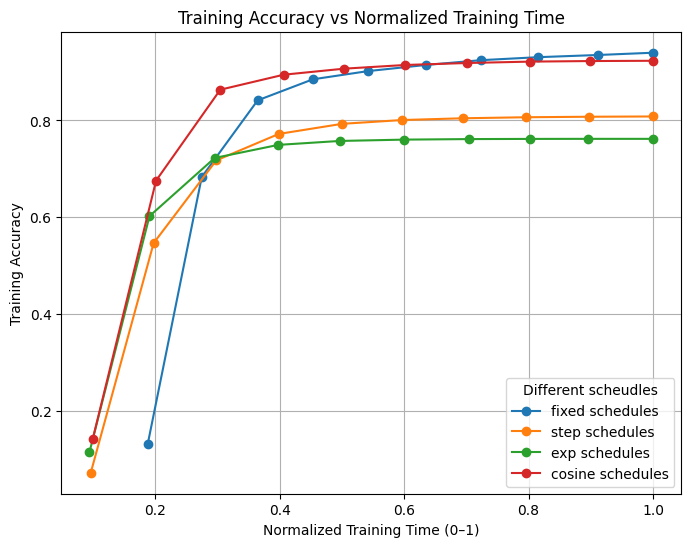

In [19]:
plt.figure(figsize=(8,6))

for i, S in enumerate(Sresults_dic):
    times = np.array(Sresults_dic[S]["time"])
    accs = np.array(Sresults_dic[S]["acc"])
    
    cumulative_times = np.cumsum(times)
    norm_times = cumulative_times / cumulative_times[-1]
    
    plt.plot(norm_times, accs, marker='o', label=f"{S} schedules")

plt.xlabel("Normalized Training Time (0–1)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Normalized Training Time")
plt.legend(title="Different scheudles")
plt.grid(True)
plt.show()

#### Pareto Frontier

Text(0.5, 1.0, 'Accuracy vs Training Time (Pareto Frontier)')

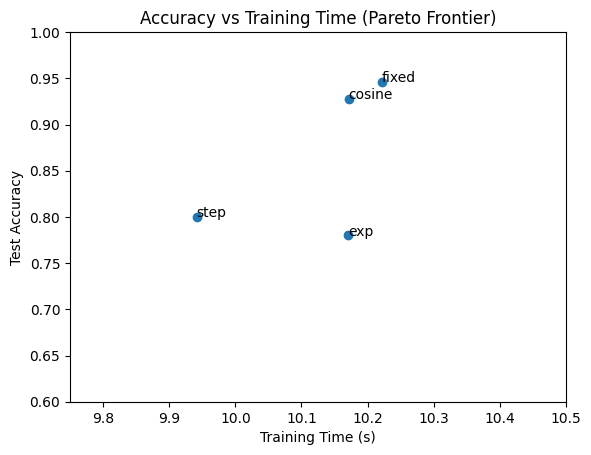

In [32]:
plt.scatter(Stotal_times, Stest_accs)
for i, S in enumerate(schedules):
    plt.text(Stotal_times[i], Stest_accs[i], f"{S}")


plt.ylim(0.6, 1.0)
plt.xlim(9.75,10.5)
plt.xlabel("Training Time (s)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Training Time (Pareto Frontier)")